In [1]:
import pandas as pd


In [2]:
ball_by_ball_data_path = '/content/IPL_ball_by_ball_updated till 2024 (1).csv'
ball_by_ball_df = pd.read_csv(ball_by_ball_data_path)

In [5]:
salaries_data_path = '/content/IPL SALARIES 2024.xlsx'
salaries_df = pd.read_excel(salaries_data_path)

In [6]:
ball_by_ball_df.head(), salaries_df.head()

(   Match id        Date   Season           Batting team  \
 0    335982  18-04-2008  2007/08  Kolkata Knight Riders   
 1    335982  18-04-2008  2007/08  Kolkata Knight Riders   
 2    335982  18-04-2008  2007/08  Kolkata Knight Riders   
 3    335982  18-04-2008  2007/08  Kolkata Knight Riders   
 4    335982  18-04-2008  2007/08  Kolkata Knight Riders   
 
                   Bowling team  Innings No  Ball No   Bowler      Striker  \
 0  Royal Challengers Bangalore           1      0.1  P Kumar   SC Ganguly   
 1  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
 2  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
 3  Royal Challengers Bangalore           1      0.3  P Kumar  BB McCullum   
 4  Royal Challengers Bangalore           1      0.4  P Kumar  BB McCullum   
 
    Non Striker  runs_scored  extras type of extras  score score/wicket  \
 0  BB McCullum          0.0     1.0        legbyes    1.0          1/0   
 1   SC Ganguly   

In [7]:
ball_by_ball_df['Date'] = pd.to_datetime(ball_by_ball_df['Date'], format='%d-%m-%Y')

In [8]:
ball_by_ball_df['Round'] = (ball_by_ball_df['Match id'] - ball_by_ball_df['Match id'].min()) // 10 + 1


In [9]:
match_summary = ball_by_ball_df.groupby(['Round', 'Match id', 'Season', 'Date', 'Striker', 'Bowler']).agg({
    'runs_scored': 'sum',
    'wicket_confirmation': 'sum'
}).reset_index()

In [10]:
match_summary.rename(columns={
    'Striker': 'Batsman',
    'Bowler': 'Bowler',
    'runs_scored': 'Runs Scored',
    'wicket_confirmation': 'Wickets Taken'
}, inplace=True)

In [11]:
match_summary.head()

,Round,Match id,Season,Date,Batsman,Bowler,Runs Scored,Wickets Taken
0,1,335982,2007/08,2008-04-18,AA Noffke,AB Agarkar,2.0,0.0
1,1,335982,2007/08,2008-04-18,AA Noffke,SC Ganguly,7.0,1.0
2,1,335982,2007/08,2008-04-18,B Akhil,AB Agarkar,0.0,1.0
3,1,335982,2007/08,2008-04-18,BB McCullum,AA Noffke,24.0,0.0
4,1,335982,2007/08,2008-04-18,BB McCullum,CL White,16.0,0.0


In [12]:
# Find top 3 run-getters and wicket-takers per round

# Helper function to get top 3 performers per round
def get_top_performers(df, column, top_n=3):
    return df.groupby('Round').apply(lambda x: x.nlargest(top_n, column)).reset_index(drop=True)

# Top 3 run-getters per round
top_run_getters = get_top_performers(match_summary, 'Runs Scored')

# Top 3 wicket-takers per round
top_wicket_takers = get_top_performers(match_summary, 'Wickets Taken')

# Display results
top_run_getters.head(10), top_wicket_takers.head(10)

(   Round  Match id   Season       Date        Batsman           Bowler  \
 0      1    335990  2007/08 2008-04-24      A Symonds         SK Warne   
 1      1    335982  2007/08 2008-04-18    BB McCullum           Z Khan   
 2      1    335982  2007/08 2008-04-18    BB McCullum        JH Kallis   
 3      2    335996  2007/08 2008-04-28       MS Dhoni         DW Steyn   
 4      2    335999  2007/08 2008-05-01      RG Sharma  Gagandeep Singh   
 5      2    335994  2007/08 2008-04-27   AC Gilchrist       SM Pollock   
 6      3    336003  2007/08 2008-05-03      DJ Hussey  Gagandeep Singh   
 7      3    336006  2007/08 2008-05-05       R Dravid        VRV Singh   
 8      3    336011  2007/08 2008-05-09      YK Pathan          PP Ojha   
 9      4    336018  2007/08 2008-05-14  ST Jayasuriya        JA Morkel   
 
    Runs Scored  Wickets Taken  
 0         35.0            0.0  
 1         33.0            0.0  
 2         32.0            0.0  
 3         31.0            0.0  
 4      

In [13]:
# Filter the data for the last three IPL seasons
latest_seasons = ball_by_ball_df['Season'].unique()[-3:]
latest_data = ball_by_ball_df[ball_by_ball_df['Season'].isin(latest_seasons)]
print (latest_data)


       Match id       Date   Season                 Batting team  \
0        335982 2008-04-18  2007/08        Kolkata Knight Riders   
1        335982 2008-04-18  2007/08        Kolkata Knight Riders   
2        335982 2008-04-18  2007/08        Kolkata Knight Riders   
3        335982 2008-04-18  2007/08        Kolkata Knight Riders   
4        335982 2008-04-18  2007/08        Kolkata Knight Riders   
...         ...        ...      ...                          ...   
34535    419136 2010-04-02  2009/10  Royal Challengers Bangalore   
34536    419136 2010-04-02  2009/10  Royal Challengers Bangalore   
34537    419136 2010-04-02  2009/10  Royal Challengers Bangalore   
34538    419136 2010-04-02  2009/10  Royal Challengers Bangalore   
34539    419136 2010-04-02  2009/10  Royal Challengers Bangalore   

                      Bowling team  Innings No  Ball No       Bowler  \
0      Royal Challengers Bangalore           1      0.1      P Kumar   
1      Royal Challengers Bangalore     

In [14]:
# Filter R Ashwin's performance data
ashwin_performance = ball_by_ball_df[(ball_by_ball_df['Striker'] == 'R Ashwin') | (ball_by_ball_df['Bowler'] == 'R Ashwin')]

# Summarize performance metrics
ashwin_summary = ashwin_performance.groupby('Season').agg({
    'runs_scored': lambda x: x[(ashwin_performance['Striker'] == 'R Ashwin')].sum(),
    'wicket_confirmation': lambda x: x[(ashwin_performance['Bowler'] == 'R Ashwin')].sum()
}).reset_index()

# Check if 'R Ashwin' is in the salary dataset
ashwin_salary = salaries_df[salaries_df['Player'].str.contains('Ashwin', case=False)]

# If the salary information for Ashwin is found, add it to the summary
if not ashwin_salary.empty:
    ashwin_summary['Salary'] = ashwin_salary['Salary'].values[0]

ashwin_summary.head()

,Season,runs_scored,wicket_confirmation,Salary
0,2009,8.0,2.0,5 crore
1,2009/10,13.0,4.0,5 crore


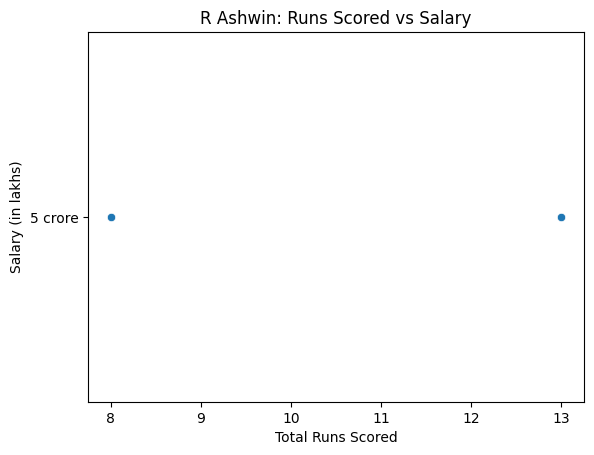

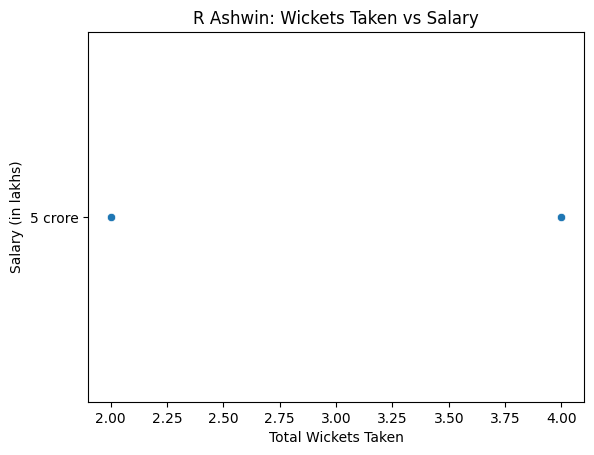

Pearson correlation between runs scored and salary for R Ashwin: nan
Pearson correlation between wickets taken and salary for R Ashwin: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

if not ashwin_salary.empty:
    # Scatter plot for runs scored vs salary
    sns.scatterplot(data=ashwin_summary, x='runs_scored', y='Salary')
    plt.title('R Ashwin: Runs Scored vs Salary')
    plt.xlabel('Total Runs Scored')
    plt.ylabel('Salary (in lakhs)')
    plt.show()

    # Scatter plot for wickets taken vs salary
    sns.scatterplot(data=ashwin_summary, x='wicket_confirmation', y='Salary')
    plt.title('R Ashwin: Wickets Taken vs Salary')
    plt.xlabel('Total Wickets Taken')
    plt.ylabel('Salary (in lakhs)')
    plt.show()

    # Calculate Pearson correlation coefficients
    runs_salary_corr, _ = pearsonr(ashwin_summary['runs_scored'], ashwin_summary['Salary'])
    wickets_salary_corr, _ = pearsonr(ashwin_summary['wicket_confirmation'], ashwin_summary['Salary'])

    print(f'Pearson correlation between runs scored and salary for R Ashwin: {runs_salary_corr}')
    print(f'Pearson correlation between wickets taken and salary for R Ashwin: {wickets_salary_corr}')
else:
    print("R Ashwin's salary data not found in the dataset.")